In [ ]:
from PIL import Image

im = Image.open('data/images/jk.jpg')
im.size

In [ ]:
import numpy as np

im_pillow = np.asarray(im)
im_pillow.shape

In [11]:
!pip install opencv-python
!apt update
!apt install libgl1

/usr/bin/sh: 1: sudo: not found
/usr/bin/sh: 1: sudo: not found


In [75]:
import cv2

im_cv2 = cv2.imread('./data/images/jk.jpg')
print(type(im_cv2))

print(im_cv2.shape)

<class 'numpy.ndarray'>
(116, 318, 3)


In [93]:
# 获取对应的RGB通道
im_pillow_c1 = im_pillow[:, :, 0]
im_pillow_c2 = im_pillow[:, :, 1]
im_pillow_c3 = im_pillow[:, :, 2]

print(im_pillow_c1)



[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [94]:
# 通道调整
zeros = np.zeros((im_pillow_c1.shape[0], im_pillow_c1.shape[1], 1))
zeros.shape

(116, 318, 1)

In [79]:
im_pillow_c1 = im_pillow_c1[:, :, np.newaxis]
im_pillow_c1.shape

(116, 318, 1)

In [80]:
im_pillow_c1_3ch = np.concatenate((im_pillow_c1, zeros, zeros), axis=2)
im_pillow_c1_3ch.shape

(116, 318, 3)

In [106]:
# 方法二调整
im_pillow_c2_3ch = np.zeros(im_pillow.shape)
im_pillow_c2_3ch[:, :, 1] = im_pillow_c2

im_pillow_c3_3ch = np.zeros(im_pillow.shape)
im_pillow_c3_3ch[:, :, 2] = im_pillow_c3

im_pillow_c2_3ch.shape

(116, 318, 3)

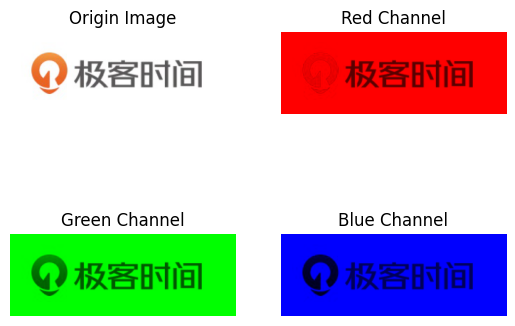

In [107]:
from matplotlib import pyplot as plt

plt.subplot(2, 2, 1)
plt.title('Origin Image')
plt.imshow(im_pillow)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Red Channel')
plt.imshow(im_pillow_c1_3ch.astype(np.uint8))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Green Channel')
plt.imshow(im_pillow_c2_3ch.astype(np.uint8))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Blue Channel')
plt.imshow(im_pillow_c3_3ch.astype(np.uint8))
plt.axis('off')

plt.savefig('./rgb_pillow.png', dpi=150)

(-0.5, 255.5, 255.5, -0.5)

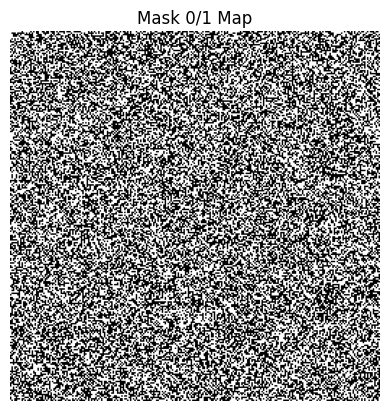

In [108]:
scores = np.random.rand(256, 256, 2)
scores[:,:,1] = 1 - scores[:,:,0]

scores.view()

mask = (scores[:, :, 0] <= scores[:, :, 1]).astype(np.uint8)

import matplotlib.pyplot as plt

plt.imshow(mask, cmap='gray')
plt.title('Mask 0/1 Map')
plt.axis('off')
plt.show()